In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:

# Set the start and end dates for the data
start_date = dt.datetime(2015,1,1)
end_date = dt.date.today()

# Retrieve ETH data
eth_data = yf.download('ETH-USD', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [79]:
eth_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-09,1865.594971,1878.668945,1857.748291,1863.009766,1863.009766,4392863807
2023-07-10,1863.240234,1905.460815,1848.777222,1880.556396,1880.556396,6336468234
2023-07-11,1880.654907,1889.381714,1863.218628,1878.336060,1878.336060,4905225892
2023-07-12,1878.322021,1901.148438,1865.710083,1872.113770,1872.113770,6379007000
2023-07-13,1872.040283,2011.885254,1864.496094,2006.511475,2006.511475,11114853969


## TRAIN TEST DATA

In [80]:
eth_data.sort_values("Date", axis=0, ascending=True, inplace=True)


In [81]:
eth_data = eth_data.resample('D').ffill()

In [82]:
X = eth_data.drop('Close', axis=1)
y = eth_data['Close']

In [83]:
X.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


In [85]:
y.tail()

Date
2023-07-09    1863.009766
2023-07-10    1880.556396
2023-07-11    1878.336060
2023-07-12    1872.113770
2023-07-13    2006.511475
Freq: D, Name: Close, dtype: float64

In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)


In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1658, 5), (415, 5), (1658,), (415,))

In [88]:
# Creating XGBoost train and test data
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)


In [89]:
dtrain, dtest

(<xgboost.core.DMatrix at 0x153ae0e7390>,
 <xgboost.core.DMatrix at 0x153ae156cd0>)

## TRAINING MODEL

In [95]:
# Defining hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 0
}

# Training the XGBoost model
num_round = 1000
xgb_model = xgb.train(params, dtrain, num_round)


## PREDICTING ON TESTING

In [96]:
# Perform prediction
prediction = xgb_model.predict(dtest)


In [97]:
prediction

array([1941.7573, 1836.5214, 1737.6378, 1766.2765, 1791.8794, 1989.7773,
       1933.2957, 1852.497 , 1849.5673, 1782.6439, 1787.7048, 1788.4708,
       1854.1968, 1807.7681, 1781.6775, 1786.5319, 1684.9707, 1552.0846,
       1456.086 , 1237.0203, 1213.8606, 1227.3429, 1083.3363, 1098.8918,
       1013.4867, 1110.0311, 1112.8523, 1105.9156, 1047.345 , 1154.6802,
       1225.6736, 1226.8098, 1203.3796, 1188.818 , 1140.0948, 1099.04  ,
       1093.6055, 1057.5242, 1092.9471, 1092.8148, 1154.8483, 1109.582 ,
       1195.1735, 1225.227 , 1220.9221, 1211.1813, 1160.0096, 1091.8864,
       1045.8485, 1112.0914, 1198.4938, 1224.5524, 1332.9855, 1332.6276,
       1537.9016, 1553.6136, 1545.8911, 1540.8246, 1542.9928, 1553.9603,
       1598.1006, 1452.9293, 1401.836 , 1593.054 , 1735.0321, 1735.9099,
       1680.5938, 1668.4879, 1624.0573, 1598.2573, 1596.954 , 1596.95  ,
       1722.8922, 1677.38  , 1683.2346, 1768.2294, 1686.7838, 1857.2622,
       1860.2383, 1959.9751, 1981.4867, 1930.4094, 

In [98]:
y_test_transformed = y_test.values
y_test_transformed


array([1944.82788086, 1803.91333008, 1724.92285156, 1757.94177246,
       1812.03100586, 1996.44128418, 1942.32800293, 1823.56933594,
       1834.1505127 , 1775.07861328, 1801.60949707, 1805.20495605,
       1859.28967285, 1814.04833984, 1793.57226562, 1789.8260498 ,
       1665.04223633, 1529.66345215, 1445.21655273, 1204.58276367,
       1211.6628418 , 1233.2064209 , 1067.73071289, 1086.51928711,
        993.63677979, 1127.65649414, 1127.64245605, 1124.82458496,
       1051.421875  , 1143.38671875, 1226.84472656, 1243.44689941,
       1199.83166504, 1193.68066406, 1144.57922363, 1098.94384766,
       1067.29882812, 1059.76733398, 1066.51281738, 1073.76696777,
       1151.05908203, 1134.54101562, 1186.97399902, 1237.59338379,
       1222.50622559, 1216.97827148, 1168.40161133, 1097.23657227,
       1038.19165039, 1113.5871582 , 1191.52624512, 1233.12915039,
       1352.62646484, 1338.63574219, 1578.71789551, 1542.97521973,
       1520.20068359, 1576.74951172, 1537.40515137, 1549.29748

#### Comparing actual and prediction

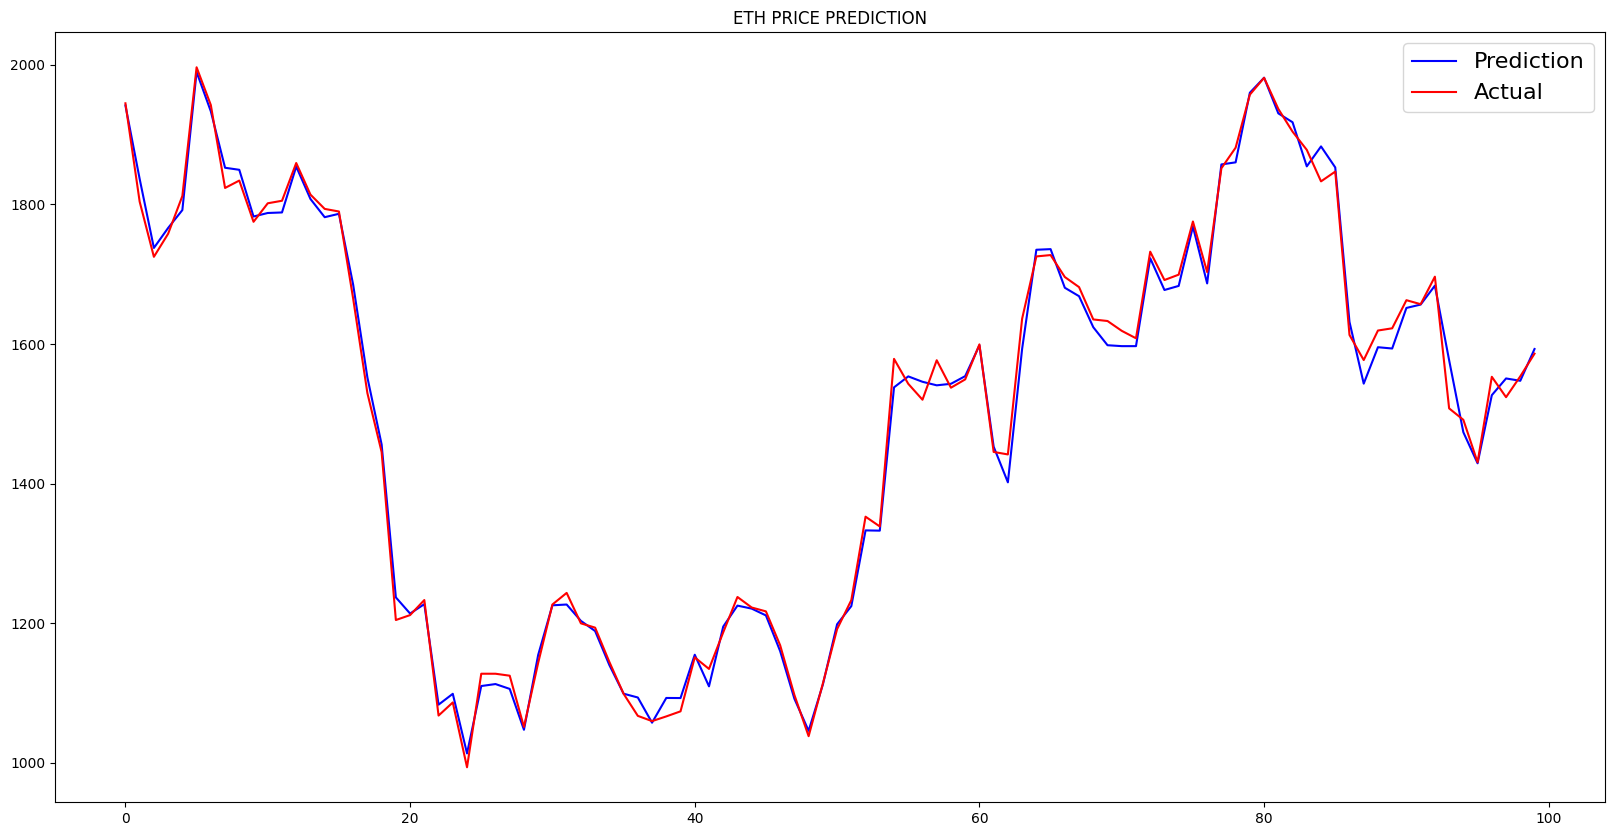

In [99]:
# Plot value in the first 100 days
plt.figure(figsize=(20, 10))
plt.plot(prediction[:100], color='blue', label='Prediction')
plt.plot(y_test_transformed[:100], color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


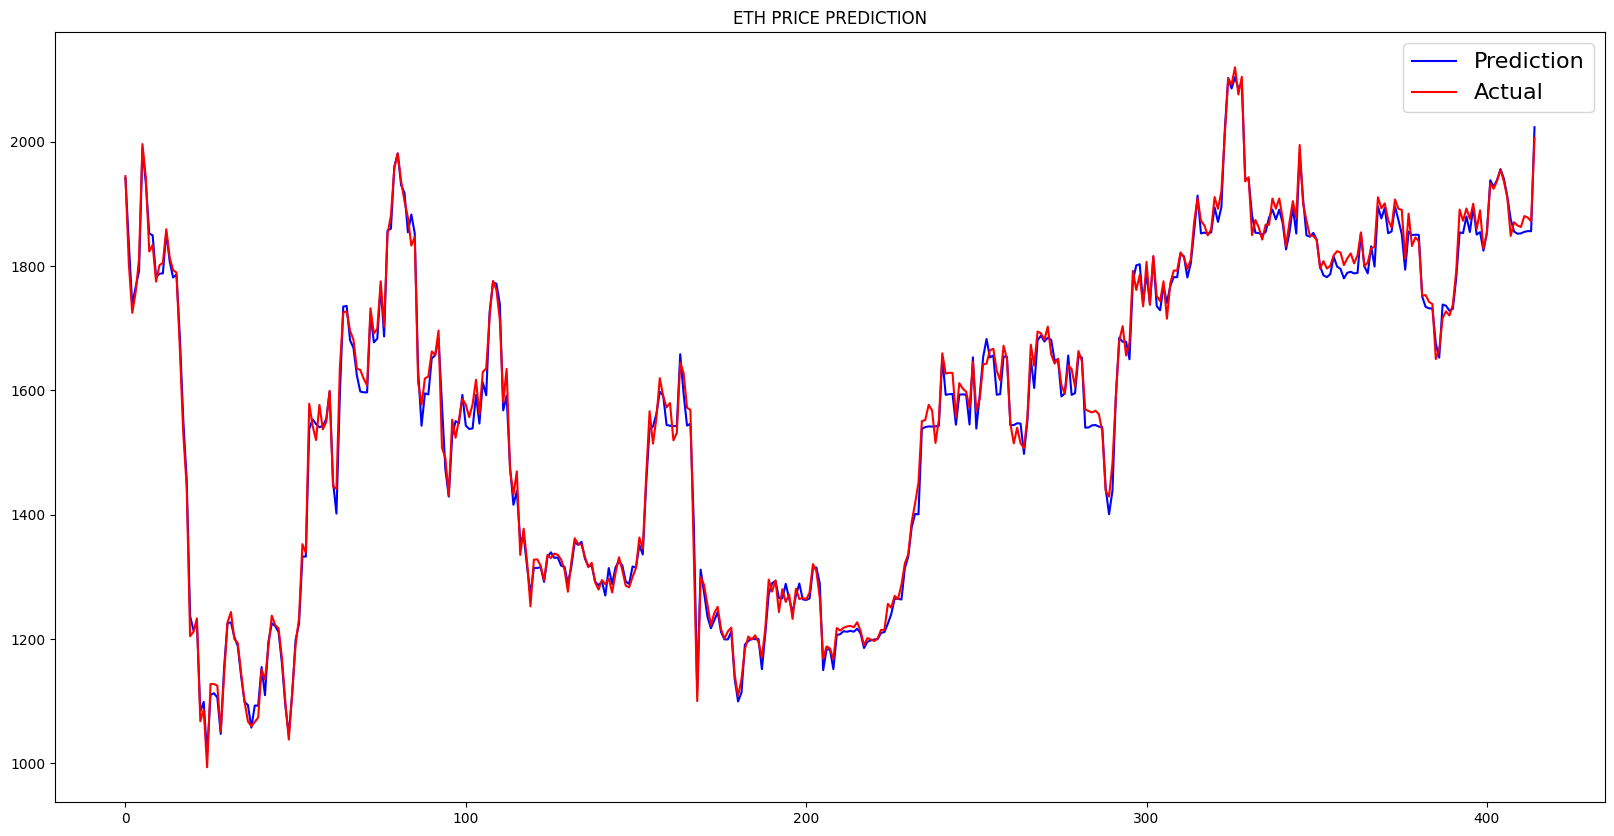

In [100]:
# Plot value
plt.figure(figsize=(20, 10))
plt.plot(prediction, color='blue', label='Prediction')
plt.plot(y_test_transformed, color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


####  The day future

In [20]:
# Get the data for the previous 30 days
previous_data = eth_data.iloc[-101:-1]

In [21]:

# Separate the features and the target variable (Close price)
X_previous = previous_data.drop('Close', axis=1)
y_previous = previous_data['Close']


In [22]:
# Create DMatrix for the previous data
dprevious = xgb.DMatrix(X_previous.values)

In [23]:
# Use the trained model to predict the next day's price
predicted_price = xgb_model.predict(dprevious)

In [24]:
# Display the predicted ETH prices for the first 10 days
for i in range(100):
    print(f"Day {i+1} - Predicted ETH price: {predicted_price[i]}")

Day 1 - Predicted ETH price: 1817.125
Day 2 - Predicted ETH price: 1878.9071044921875
Day 3 - Predicted ETH price: 1901.7308349609375
Day 4 - Predicted ETH price: 1873.2813720703125
Day 5 - Predicted ETH price: 1872.6798095703125
Day 6 - Predicted ETH price: 1846.143798828125
Day 7 - Predicted ETH price: 1872.7498779296875
Day 8 - Predicted ETH price: 1894.2977294921875
Day 9 - Predicted ETH price: 1897.350830078125
Day 10 - Predicted ETH price: 1911.2523193359375
Day 11 - Predicted ETH price: 1999.378173828125
Day 12 - Predicted ETH price: 2104.326171875
Day 13 - Predicted ETH price: 2111.326171875
Day 14 - Predicted ETH price: 2125.528564453125
Day 15 - Predicted ETH price: 2061.350830078125
Day 16 - Predicted ETH price: 2116.85888671875
Day 17 - Predicted ETH price: 1938.59375
Day 18 - Predicted ETH price: 1937.9833984375
Day 19 - Predicted ETH price: 1852.7012939453125
Day 20 - Predicted ETH price: 1872.2596435546875
Day 21 - Predicted ETH price: 1874.3275146484375
Day 22 - Predict

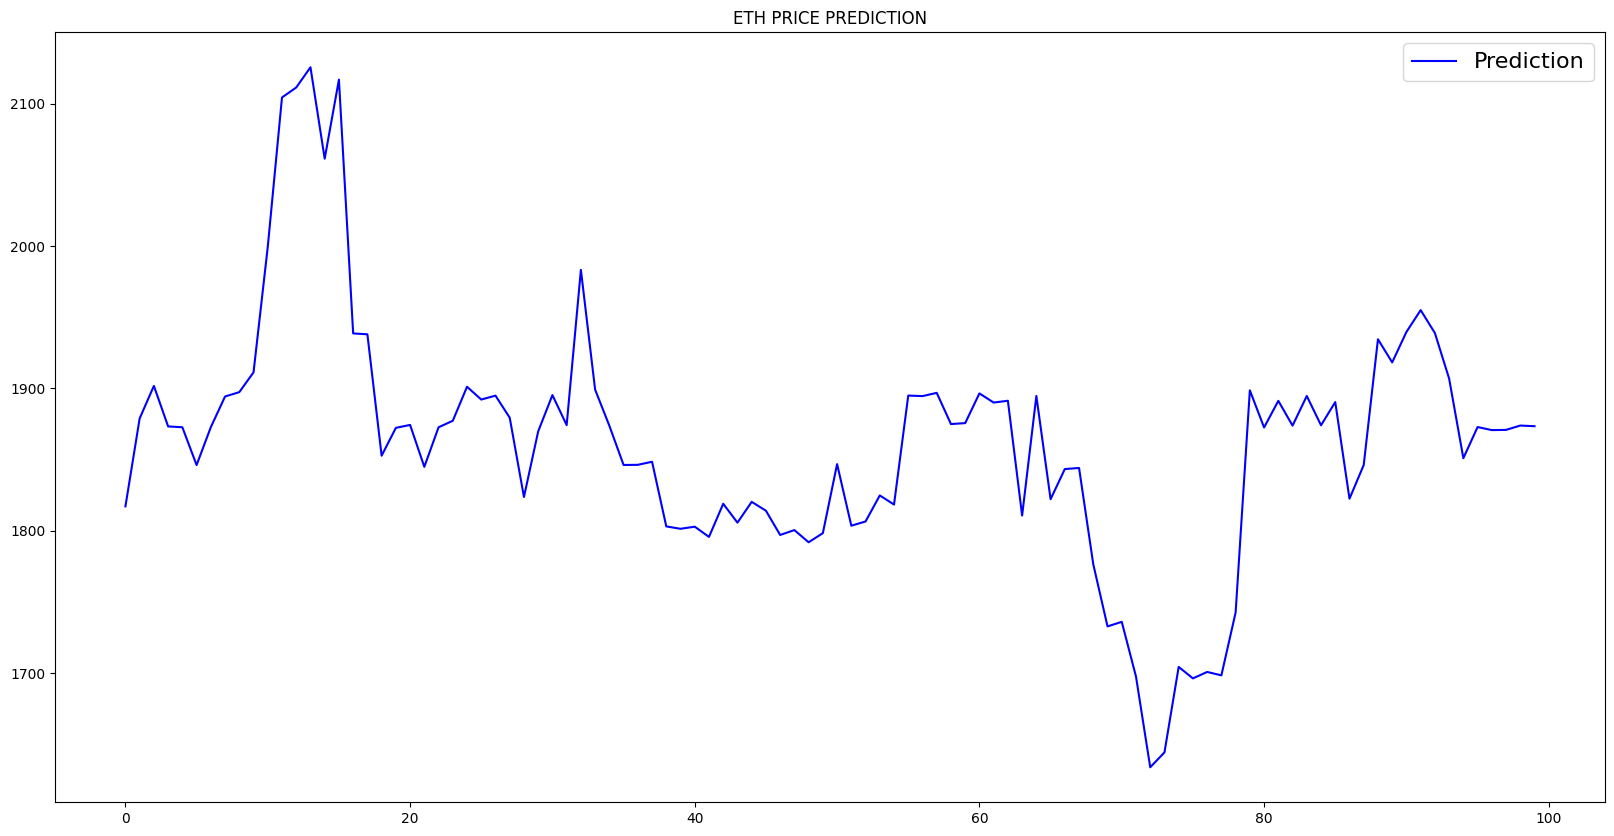

In [25]:
# Plot value in the first 100 days
plt.figure(figsize=(20, 10))
plt.plot(predicted_price, color='blue', label='Prediction')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


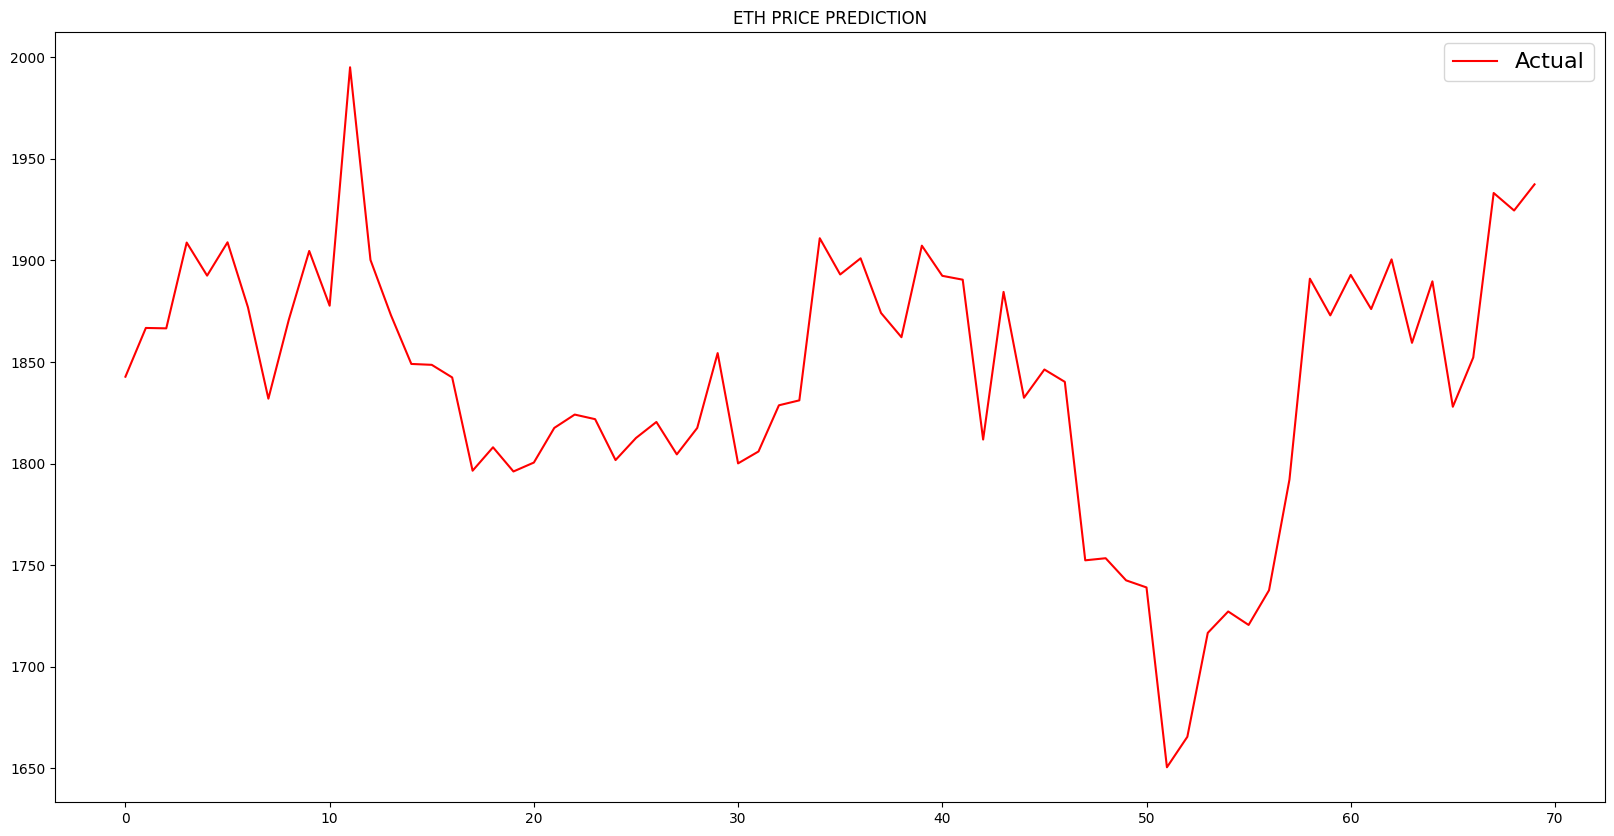

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(y_test_transformed[-80:-10], color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


In [27]:
y_test


Date
2022-06-04    1801.609497
2022-06-05    1805.204956
2022-06-06    1859.289673
2022-06-07    1814.048340
2022-06-08    1793.572266
                 ...     
2023-07-08    1865.539551
2023-07-09    1863.009766
2023-07-10    1880.556396
2023-07-11    1878.336060
2023-07-12    1872.113770
Freq: D, Name: Close, Length: 404, dtype: float64

In [28]:
y_test_transformed[-33:]


array([1752.38476562, 1753.4152832 , 1742.52868652, 1739.03759766,
       1650.51928711, 1665.51977539, 1716.66882324, 1727.20410156,
       1720.57751465, 1737.65942383, 1792.11999512, 1891.00720215,
       1872.94299316, 1892.86206055, 1876.05969238, 1900.50610352,
       1859.43286133, 1889.70336914, 1827.97119141, 1852.22729492,
       1933.18896484, 1924.56591797, 1937.43835449, 1955.38916016,
       1936.63354492, 1910.5880127 , 1848.63647461, 1870.60253906,
       1865.53955078, 1863.00976562, 1880.55639648, 1878.33605957,
       1872.11376953])

## THE FUTURE PRICE

In [69]:
latest_date = eth_data.index[-1]


In [70]:
# Calculate the next 7 days
prediction_dates = [latest_date + dt.timedelta(days=i) for i in range(1, 8)]


In [71]:
# Create a DataFrame with the prediction dates
prediction_data = pd.DataFrame({'Date': prediction_dates})
prediction_data = prediction_data.set_index('Date')


In [72]:
# Resample the prediction data to match the frequency of the training data
prediction_data = prediction_data.resample('D').ffill()


In [73]:
prediction_data


""
Date
2023-07-13
2023-07-14
2023-07-15
2023-07-16
2023-07-17
2023-07-18
2023-07-19


In [74]:
# Convert the prediction data to XGBoost-specific data structure
dpred = xgb.DMatrix(prediction_data.values)


In [75]:
# Make the predictions using the trained model
predicted_prices = xgb_model.predict(dpred)


In [76]:

# Print the predicted prices for each day
for date, price in zip(prediction_dates, predicted_prices):
    print(f"The predicted price of ETH on {date.date()} is ${price:.2f}")


The predicted price of ETH on 2023-07-13 is $84.19
The predicted price of ETH on 2023-07-14 is $84.19
The predicted price of ETH on 2023-07-15 is $84.19
The predicted price of ETH on 2023-07-16 is $84.19
The predicted price of ETH on 2023-07-17 is $84.19
The predicted price of ETH on 2023-07-18 is $84.19
The predicted price of ETH on 2023-07-19 is $84.19


## FORECASTING 

In [101]:
# Forecast future prices
# Forecasting for the next 7 days
future_dates = pd.date_range(start=eth_data.index[-1], periods=7, freq='D')
future_features = xgb.DMatrix(pd.DataFrame(
    index=future_dates, columns=X.columns).values)
future_predictions = xgb_model.predict(future_features)

In [103]:
future_features

In [102]:
future_dates

DatetimeIndex(['2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
               '2023-07-17', '2023-07-18', '2023-07-19'],
              dtype='datetime64[ns]', freq='D')

In [104]:

# Display the future price predictions
print('Future Price Predictions:')
for date, price in zip(future_dates, future_predictions):
    print(date, ':', price)


Future Price Predictions:
2023-07-13 00:00:00 : 86.65693
2023-07-14 00:00:00 : 86.65693
2023-07-15 00:00:00 : 86.65693
2023-07-16 00:00:00 : 86.65693
2023-07-17 00:00:00 : 86.65693
2023-07-18 00:00:00 : 86.65693
2023-07-19 00:00:00 : 86.65693
